In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import folium
# a command that allow figures to show automatically
%matplotlib inline

In [2]:
# reference
# https://toddwschneider.com/dashboards/nyc-taxi-ridehailing-uber-lyft-data/data_reports_monthly_indicators.csv
url = 'https://toddwschneider.com/dashboards/nyc-taxi-ridehailing-uber-lyft-data/data_reports_monthly_indicators.csv'
data = pd.read_csv("data_reports_monthly_indicators.csv", sep=",")
data.head()

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
0,2020-02,FHV - High Volume,"749,117",-,"79,282","78,090","55,138",20.5,6.6,20.5,6.5,17,-,"97,114"
1,2020-02,Green,"13,743","240,822","2,843","2,674","2,006",21.8,5.0,20.9,4.9,15.4,44%,NaN
2,2020-02,Yellow,"217,216","3,556,118","20,126","11,419","10,349",26.3,10.8,20.9,7.7,13.5,75%,NaN
3,2020-01,FHV - Black Car,"22,195",-,"8,625","8,634","4,409",15.8,4.0,15.9,4.0,25,-,-
4,2020-01,FHV - Livery,"35,036",-,"7,548","7,305","4,905",20.8,5.2,20.5,5.1,17,-,-


In [3]:
# let extract the features of data
data.columns

Index(['Month/Year', 'License Class', 'Trips Per Day', 'Farebox Per Day',
       'Unique Drivers', 'Unique Vehicles', 'Vehicles Per Day',
       'Avg Days Vehicles on Road', 'Avg Hours Per Day Per Vehicle',
       'Avg Days Drivers on Road', 'Avg Hours Per Day Per Driver',
       'Avg Minutes Per Trip', 'Percent of Trips Paid with Credit Card',
       'Trips Per Day Shared'],
      dtype='object')

In [4]:
# let see the shape of this data
data.shape

(446, 14)

In [5]:
# let check the data type
data.dtypes

Month/Year                                 object
License Class                              object
Trips Per Day                              object
Farebox Per Day                            object
Unique Drivers                             object
Unique Vehicles                            object
Vehicles Per Day                           object
Avg Days Vehicles on Road                 float64
Avg Hours Per Day Per Vehicle             float64
Avg Days Drivers on Road                  float64
Avg Hours Per Day Per Driver              float64
Avg Minutes Per Trip                       object
Percent of Trips Paid with Credit Card     object
Trips Per Day Shared                       object
dtype: object

In [6]:
# let check missing values
data.isnull().sum()

Month/Year                                0
License Class                             0
Trips Per Day                             0
Farebox Per Day                           0
Unique Drivers                            0
Unique Vehicles                           0
Vehicles Per Day                          0
Avg Days Vehicles on Road                 0
Avg Hours Per Day Per Vehicle             0
Avg Days Drivers on Road                  0
Avg Hours Per Day Per Driver              0
Avg Minutes Per Trip                      0
Percent of Trips Paid with Credit Card    0
Trips Per Day Shared                      4
dtype: int64

In [7]:
# let see which Month/Year are covered in data
data['Month/Year'].unique()

array(['2020-02', '2020-01', '2019-12', '2019-11', '2019-10', '2019-09',
       '2019-08', '2019-07', '2019-06', '2019-05', '2019-04', '2019-03',
       '2019-02', '2019-01', '2018-12', '2018-11', '2018-10', '2018-09',
       '2018-08', '2018-07', '2018-06', '2018-05', '2018-04', '2018-03',
       '2018-02', '2018-01', '2017-12', '2017-11', '2017-10', '2017-09',
       '2017-08', '2017-07', '2017-06', '2017-05', '2017-04', '2017-03',
       '2017-02', '2017-01', '2016-12', '2016-11', '2016-10', '2016-09',
       '2016-08', '2016-07', '2016-06', '2016-05', '2016-04', '2016-03',
       '2016-02', '2016-01', '2015-12', '2015-11', '2015-10', '2015-09',
       '2015-08', '2015-07', '2015-06', '2015-05', '2015-04', '2015-03',
       '2015-02', '2015-01', '2014-12', '2014-11', '2014-10', '2014-09',
       '2014-08', '2014-07', '2014-06', '2014-05', '2014-04', '2014-03',
       '2014-02', '2014-01', '2013-12', '2013-11', '2013-10', '2013-09',
       '2013-08', '2013-07', '2013-06', '2013-05', 

In [8]:
# We see that from 01-2010 to 02-2020 are covered, to simplify my analysis I would like to group the data by year
# first let convert Month/Year dtype = object to datetime
data['Month/Year']=pd.to_datetime(data['Month/Year'])
data['Month/Year']

0     2020-02-01
1     2020-02-01
2     2020-02-01
3     2020-01-01
4     2020-01-01
         ...    
441   2010-05-01
442   2010-04-01
443   2010-03-01
444   2010-02-01
445   2010-01-01
Name: Month/Year, Length: 446, dtype: datetime64[ns]

In [9]:
# Second let extract only Year 
Year = data['Month/Year'].dt.year
Year

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
441    2010
442    2010
443    2010
444    2010
445    2010
Name: Month/Year, Length: 446, dtype: int64

In [10]:
# Third let add column named Year to data
data['Year'] = Year
data

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared,Year
0,2020-02-01,FHV - High Volume,"749,117",-,"79,282","78,090","55,138",20.5,6.6,20.5,6.5,17,-,"97,114",2020
1,2020-02-01,Green,"13,743","240,822","2,843","2,674","2,006",21.8,5.0,20.9,4.9,15.4,44%,NaN,2020
2,2020-02-01,Yellow,"217,216","3,556,118","20,126","11,419","10,349",26.3,10.8,20.9,7.7,13.5,75%,NaN,2020
3,2020-01-01,FHV - Black Car,"22,195",-,"8,625","8,634","4,409",15.8,4.0,15.9,4.0,25,-,-,2020
4,2020-01-01,FHV - Livery,"35,036",-,"7,548","7,305","4,905",20.8,5.2,20.5,5.1,17,-,-,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,2010-05-01,Yellow,"499,374","5,561,218","30,950","13,309","12,729",29.6,14.8,22.7,8.3,-,35%,-,2010
442,2010-04-01,Yellow,"504,798","5,502,545","30,827","13,326","12,856",28.9,14.8,22.3,8.3,-,35%,-,2010
443,2010-03-01,Yellow,"415,567","3,011,750","28,709","12,183","10,382",26.4,15.1,20.4,8.3,11.5,35%,-,2010
444,2010-02-01,Yellow,"397,969","3,392,416","28,255","12,171","10,045",23.1,14.6,17.6,8.3,11.1,35%,-,2010


In [11]:
# let see which Year are covered in data now
data['Year'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010],
      dtype=int64)

In [49]:
# let convert Trips Per Day column to float 
# first we see trips per day values contain comas so let replace them before convert 
data['Trips Per Day'].replace(to_replace=",", value='', regex=True, inplace = True)
data

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared,Year
0,2020-02-01,FHV - High Volume,749117.0,-,"79,282","78,090","55,138",20.5,6.6,20.5,6.5,17,-,"97,114",2020
1,2020-02-01,Green,13743.0,"240,822","2,843","2,674","2,006",21.8,5.0,20.9,4.9,15.4,44%,NaN,2020
2,2020-02-01,Yellow,217216.0,"3,556,118","20,126","11,419","10,349",26.3,10.8,20.9,7.7,13.5,75%,NaN,2020
3,2020-01-01,FHV - Black Car,22195.0,-,"8,625","8,634","4,409",15.8,4.0,15.9,4.0,25,-,-,2020
4,2020-01-01,FHV - Livery,35036.0,-,"7,548","7,305","4,905",20.8,5.2,20.5,5.1,17,-,-,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,2010-05-01,Yellow,499374.0,"5,561,218","30,950","13,309","12,729",29.6,14.8,22.7,8.3,-,35%,-,2010
442,2010-04-01,Yellow,504798.0,"5,502,545","30,827","13,326","12,856",28.9,14.8,22.3,8.3,-,35%,-,2010
443,2010-03-01,Yellow,415567.0,"3,011,750","28,709","12,183","10,382",26.4,15.1,20.4,8.3,11.5,35%,-,2010
444,2010-02-01,Yellow,397969.0,"3,392,416","28,255","12,171","10,045",23.1,14.6,17.6,8.3,11.1,35%,-,2010


In [50]:
# convert Trips Per Day dtype to float
data['Trips Per Day']=data['Trips Per Day'].astype(float)
data['Trips Per Day']

0      749117.0
1       13743.0
2      217216.0
3       22195.0
4       35036.0
         ...   
441    499374.0
442    504798.0
443    415567.0
444    397969.0
445    479376.0
Name: Trips Per Day, Length: 446, dtype: float64

In [51]:
# let extract the different type license class of data
data['License Class'].unique()

array(['FHV - High Volume', 'Green', 'Yellow', 'FHV - Black Car',
       'FHV - Livery', 'FHV - Lux Limo'], dtype=object)

In [52]:
# let see how many number of those license class are used for this database
data['License Class'].value_counts()

Yellow               122
Green                 79
FHV - High Volume     62
FHV - Lux Limo        61
FHV - Black Car       61
FHV - Livery          61
Name: License Class, dtype: int64

In [53]:
# let create a dataframe to illustrate 

groups = data.groupby('License Class')
results = groups.size()
df1 = results.to_frame(name = 'Number')
df1.head(6)

,Number
License Class,
FHV - Black Car,61
FHV - High Volume,62
FHV - Livery,61
FHV - Lux Limo,61
Green,79
Yellow,122


In [17]:
# let extract yellow cabs from data
filter1 = (data['License Class'] == 'Yellow')
Yellow_data = data[filter1]
Yellow_data.head()

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared,Year
2,2020-02-01,Yellow,217216.0,"3,556,118","20,126","11,419","10,349",26.3,10.8,20.9,7.7,13.5,75%,NaN,2020
8,2020-01-01,Yellow,206604.0,"3,403,736","20,131","11,435","10,080",27.3,10.5,21.7,7.5,13.12,73%,-,2020
14,2019-12-01,Yellow,220786.0,"3,806,944","20,829","11,478","10,260",27.7,10.7,21.7,7.5,15,71%,-,2019
20,2019-11-01,Yellow,227654.0,"3,872,769","20,934","11,431","10,441",27.4,11.0,21.7,7.6,14.8,73%,-,2019
26,2019-10-01,Yellow,231171.0,"4,006,128","20,880","11,380","10,476",28.5,11.2,22.5,7.7,15.1,73%,-,2019


In [18]:
# let sum trips per day by each year
groups = Yellow_data['Trips Per Day'].groupby(Yellow_data['Year'])
groups

In [19]:
results = groups.sum()

In [20]:
# Let convert the results to a data frame
Yellow_Cabs = results.to_frame(name='Yellow Cabs Trips Per Year')

Yellow_Cabs

,Yellow Cabs Trips Per Year
Year,
2010,5553484.0
2011,5817862.0
2012,5855148.0
2013,5695709.0
2014,5430254.0
2015,4807701.0
2016,4303545.0
2017,3733496.0
2018,3381635.0


Text(0, 0.5, 'Number Of Trip')

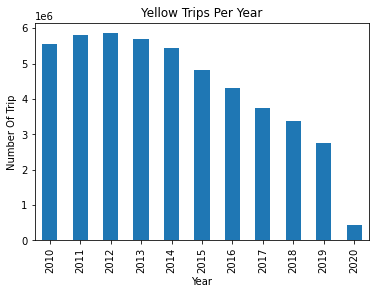

In [21]:
# let show the bar plot of Yellow cabs trips per yer
Yellow_Cabs['Yellow Cabs Trips Per Year'].plot.bar()
plt.title("Yellow Trips Per Year")
plt.ylabel("Number Of Trip")

In [22]:
# let calculate the maximum and min trip per year of yellow cabs 
print(Yellow_Cabs['Yellow Cabs Trips Per Year'].max())
print(Yellow_Cabs['Yellow Cabs Trips Per Year'].min())

5855148.0
423820.0


In [23]:
# let extract green cabs
filter2 = (data['License Class'] == 'Green')
Green_data = data[filter2]
Green_data.head()

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared,Year
1,2020-02-01,Green,13743.0,"240,822","2,843","2,674","2,006",21.8,5.0,20.9,4.9,15.4,44%,NaN,2020
7,2020-01-01,Green,13446.0,"236,992","2,876","2,703","1,997",22.9,5.0,22.0,4.9,15.29,44%,-,2020
13,2019-12-01,Green,11598.0,"162,078","2,904","2,731","1,834",20.8,4.4,20.0,4.4,13.6,53%,-,2019
19,2019-11-01,Green,12068.0,"170,328","2,969","2,781","1,904",20.5,4.5,19.7,4.4,13.8,55%,-,2019
25,2019-10-01,Green,12470.0,"178,014","3,004","2,818","1,990",21.9,4.5,21.0,4.4,14,56%,-,2019


In [24]:
# let sum trips per day of green cabs by each year
Green_Cabs = Green_data['Trips Per Day'].groupby(Green_data['Year']).sum().to_frame(name='Green Cabs Trips Per Year')
Green_Cabs

,Green Cabs Trips Per Year
Year,
2013,39519.0
2014,520251.0
2015,632672.0
2016,537538.0
2017,386194.0
2018,289476.0
2019,185100.0
2020,27189.0


Text(0, 0.5, 'Number Of Trip')

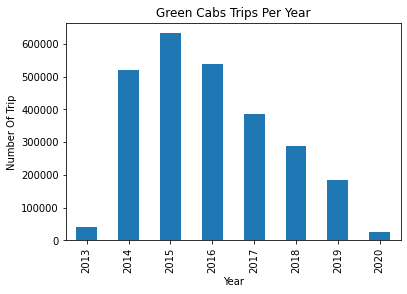

In [25]:
# let show the bar plot of Green cabs trips per yer
Green_Cabs['Green Cabs Trips Per Year'].plot.bar()
plt.title("Green Cabs Trips Per Year")
plt.ylabel("Number Of Trip")

In [26]:
# let calculate the maximum and the minimum values trips per year of green cabs
print(Green_Cabs['Green Cabs Trips Per Year'].max())
print(Green_Cabs['Green Cabs Trips Per Year'].min())

632672.0
27189.0


In [27]:
# let extract FHV-Black cabs
filter3 = (data['License Class'] == 'FHV - Black Car')
FHV_Black_Car_data = data[filter3]
FHV_Black_Car_data.head()

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared,Year
3,2020-01-01,FHV - Black Car,22195.0,-,"8,625","8,634","4,409",15.8,4.0,15.9,4.0,25,-,-,2020
9,2019-12-01,FHV - Black Car,18498.0,-,"8,019","7,994","3,873",15.0,3.8,15.1,3.8,29,-,-,2019
15,2019-11-01,FHV - Black Car,16612.0,-,"7,237","7,219","3,645",15.2,3.7,15.2,3.7,28,-,-,2019
21,2019-10-01,FHV - Black Car,16245.0,-,"7,120","7,071","3,757",16.5,3.6,16.4,3.6,29,-,-,2019
27,2019-09-01,FHV - Black Car,12373.0,-,"5,499","5,417","2,846",15.8,3.5,15.6,3.5,32,-,-,2019


In [28]:
# let group black cabs trips 
Black_Cabs = FHV_Black_Car_data['Trips Per Day'].groupby(FHV_Black_Car_data['Year']).sum().to_frame(name='Black Cabs Trips Per Year')
Black_Cabs

,Black Cabs Trips Per Year
Year,
2015,116984.0
2016,169830.0
2017,174603.0
2018,194906.0
2019,174081.0
2020,22195.0


Text(0, 0.5, 'Number Of Trip')

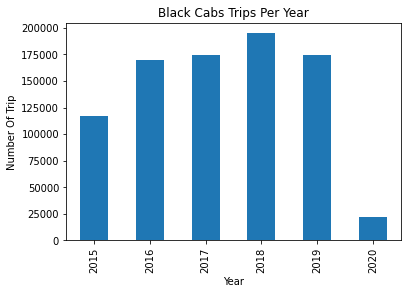

In [29]:
# let show the bar plot of Black cabs trips per yer
Black_Cabs['Black Cabs Trips Per Year'].plot.bar()
plt.title("Black Cabs Trips Per Year")
plt.ylabel("Number Of Trip")

In [30]:
# let calculate the max and min trips per year 
print(Black_Cabs['Black Cabs Trips Per Year'].max())
print(Black_Cabs['Black Cabs Trips Per Year'].min())

194906.0
22195.0


In [31]:
# let create a new data frame that group yellow, Green and Black cabs annual trips
NewDataFrame = pd.concat([Yellow_Cabs, Green_Cabs, Black_Cabs], axis = 1)
NewDataFrame

,Yellow Cabs Trips Per Year,Green Cabs Trips Per Year,Black Cabs Trips Per Year
Year,,,
2010,5553484.0,NaN,NaN
2011,5817862.0,NaN,NaN
2012,5855148.0,NaN,NaN
2013,5695709.0,39519.0,NaN
2014,5430254.0,520251.0,NaN
2015,4807701.0,632672.0,116984.0
2016,4303545.0,537538.0,169830.0
2017,3733496.0,386194.0,174603.0
2018,3381635.0,289476.0,194906.0


In [32]:
# check the missing values of this data
NewDataFrame.isnull().sum()

Yellow Cabs Trips Per Year    0
Green Cabs Trips Per Year     3
Black Cabs Trips Per Year     5
dtype: int64

In [33]:
# let calculate mean of Green Cabs Trip Per Year and Black Cabs Trips Per Year 
mean1 = NewDataFrame['Green Cabs Trips Per Year'].mean()
print(mean1)
mean2 = NewDataFrame['Black Cabs Trips Per Year'].mean()
print(mean2)

327242.375
142099.83333333334


In [34]:
# let replace those missing values by theirs means

NewDataFrame['Green Cabs Trips Per Year'].fillna(mean1, inplace = True)
NewDataFrame['Black Cabs Trips Per Year'].fillna(mean2, inplace = True)
NewDataFrame

,Yellow Cabs Trips Per Year,Green Cabs Trips Per Year,Black Cabs Trips Per Year
Year,,,
2010,5553484.0,327242.375,142099.833333
2011,5817862.0,327242.375,142099.833333
2012,5855148.0,327242.375,142099.833333
2013,5695709.0,39519.000,142099.833333
2014,5430254.0,520251.000,142099.833333
2015,4807701.0,632672.000,116984.000000
2016,4303545.0,537538.000,169830.000000
2017,3733496.0,386194.000,174603.000000
2018,3381635.0,289476.000,194906.000000


Text(0, 0.5, 'Number Of Trip')

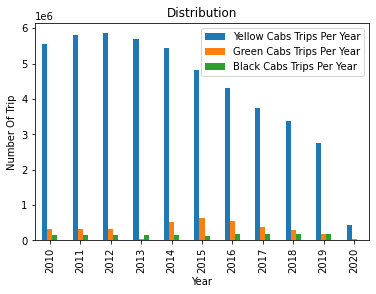

In [35]:
# let show the distribution of those 3 Licenses Class
NewDataFrame[['Yellow Cabs Trips Per Year', 'Green Cabs Trips Per Year', 'Black Cabs Trips Per Year']].plot.bar()
plt.title("Distribution")
plt.ylabel("Number Of Trip")

In [36]:
# let extract FHV-High Volume
filter4= (data['License Class'] == 'FHV - High Volume')
FHV_High_Volume_data = data[filter4]
FHV_High_Volume_data.head()

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared,Year
0,2020-02-01,FHV - High Volume,749117.0,-,"79,282","78,090","55,138",20.5,6.6,20.5,6.5,17,-,"97,114",2020
6,2020-01-01,FHV - High Volume,663433.0,-,"80,725","79,288","53,606",21.0,6.2,20.9,6.1,17,-,"90,550",2020
10,2019-12-01,FHV - High Volume,717497.0,-,"82,527","80,924","55,796",21.4,6.5,21.0,6.4,18,-,"93,421",2019
16,2019-11-01,FHV - High Volume,721170.0,-,"83,017","81,286","57,241",21.1,6.5,21.0,6.4,19,-,"103,379",2019
22,2019-10-01,FHV - High Volume,682635.0,-,"83,865","82,051","57,764",21.8,6.4,21.7,6.3,19,0%,"107,676",2019


In [37]:
# let group FHV - High Volume Trips per Year
groups = FHV_High_Volume_data['Trips Per Day'].groupby(FHV_High_Volume_data['Year'])
results = groups.sum()
V = results.to_frame(name='FHV-High Volume Trips Per Year')

V

,FHV-High Volume Trips Per Year
Year,
2015,1365882.0
2016,3036606.0
2017,5219229.0
2018,7652518.0
2019,8410974.0
2020,1412550.0


Text(0, 0.5, 'Number Of Trip')

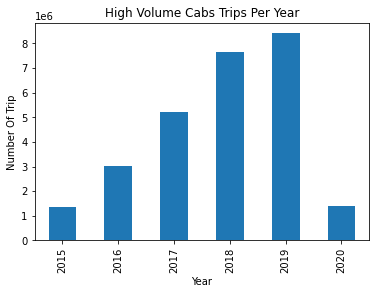

In [38]:
# let show the bar plot of High Volume cabs trips per yer
V['FHV-High Volume Trips Per Year'].plot.bar()
plt.title("High Volume Cabs Trips Per Year")
plt.ylabel("Number Of Trip")

In [39]:
# let calculate the max and min trip per year 
print(V['FHV-High Volume Trips Per Year'].max())
print(V['FHV-High Volume Trips Per Year'].min())

8410974.0
1365882.0


In [40]:
# let extract FHV - Livery
filter5= (data['License Class'] == 'FHV - Livery')
FHV_Livery_data = data[filter5]
FHV_Livery_data.head()

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared,Year
4,2020-01-01,FHV - Livery,35036.0,-,"7,548","7,305","4,905",20.8,5.2,20.5,5.1,17,-,-,2020
11,2019-12-01,FHV - Livery,38401.0,-,"7,936","7,698","5,316",21.4,5.3,21.2,5.2,18,-,-,2019
17,2019-11-01,FHV - Livery,35889.0,-,"7,524","7,293","5,086",20.9,5.2,20.7,5.1,18,-,-,2019
23,2019-10-01,FHV - Livery,38855.0,-,"8,217","7,920","5,503",21.5,5.2,21.2,5.1,18,-,-,2019
29,2019-09-01,FHV - Livery,19312.0,-,"4,183","3,979","2,633",19.9,5.3,19.2,5.2,21,-,-,2019


In [41]:
# let group FHV - Livery Trips per Year
groups = FHV_Livery_data['Trips Per Day'].groupby(FHV_Livery_data['Year'])
results = groups.sum()
Livery = results.to_frame(name='FHV- LiveryTrips Per Year')

Livery

,FHV- LiveryTrips Per Year
Year,
2015,555206.0
2016,1079347.0
2017,832363.0
2018,621840.0
2019,465040.0
2020,35036.0


Text(0, 0.5, 'Number Of Trip')

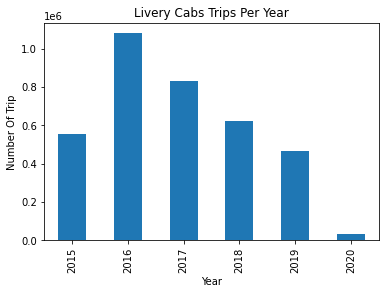

In [42]:
# let show the bar plot of Livery cabs trips per yer
Livery['FHV- LiveryTrips Per Year'].plot.bar()
plt.title("Livery Cabs Trips Per Year")
plt.ylabel("Number Of Trip")

In [43]:
# let calculate their max and min trip per year  
print(Livery['FHV- LiveryTrips Per Year'].max())
print(Livery['FHV- LiveryTrips Per Year'].min())

1079347.0
35036.0


In [44]:
# let extract FHV - Lux Limo
filter6= (data['License Class'] == 'FHV - Lux Limo')
FHV_Lux_Limo_data = data[filter6]
FHV_Lux_Limo_data.head()

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared,Year
5,2020-01-01,FHV - Lux Limo,2079.0,-,"2,162","2,128",908,13.2,2.3,13.4,2.2,59,-,-,2020
12,2019-12-01,FHV - Lux Limo,2555.0,-,"2,548","2,536","1,069",13.1,2.4,13.3,2.3,70,-,-,2019
18,2019-11-01,FHV - Lux Limo,2017.0,-,"1,853","1,776",835,14.1,2.4,14.0,2.3,67,-,-,2019
24,2019-10-01,FHV - Lux Limo,3105.0,-,"2,682","2,530","1,256",15.4,2.4,15.1,2.4,69,-,-,2019
30,2019-09-01,FHV - Lux Limo,2739.0,-,"2,522","2,402","1,098",13.7,2.5,13.5,2.4,75,-,-,2019


In [45]:
# let group FHV - Lux Limo Trips per Year
groups = FHV_Lux_Limo_data['Trips Per Day'].groupby(FHV_Lux_Limo_data['Year'])
results = groups.sum()
Lux_Limo = results.to_frame(name='FHV- Lux- Limo Trips Per Year')

Lux_Limo

,FHV- Lux- Limo Trips Per Year
Year,
2015,41994.0
2016,45407.0
2017,38861.0
2018,37093.0
2019,28598.0
2020,2079.0


Text(0, 0.5, 'Number Of Trip')

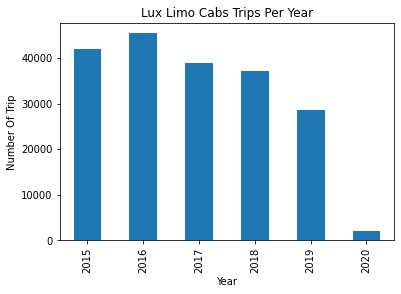

In [46]:
# let show the bar plot of Lux Limo cabs trips per yer
Lux_Limo['FHV- Lux- Limo Trips Per Year'].plot.bar()
plt.title("Lux Limo Cabs Trips Per Year")
plt.ylabel("Number Of Trip")

In [47]:
# let Calculate their max and min trips per year
print(Lux_Limo['FHV- Lux- Limo Trips Per Year'].max())
print(Lux_Limo['FHV- Lux- Limo Trips Per Year'].min())

45407.0
2079.0


In [72]:
# So far, Yellow Cabs have more than 1 million max trips per year but the number of trips 
# are decreasing since 2010 and completly fall down in 2020 
# FHV-High Volume Cabs have also 1 million max trips per year meanwhile the number of trips 
# are increasing since 2015 and completly fall down in 2020
# let join those 2 Licenses class data
NewDataFrame1 = pd.concat([Yellow_Cabs, V], axis = 1)
NewDataFrame1

,Yellow Cabs Trips Per Year,FHV-High Volume Trips Per Year
Year,,
2010,5553484.0,NaN
2011,5817862.0,NaN
2012,5855148.0,NaN
2013,5695709.0,NaN
2014,5430254.0,NaN
2015,4807701.0,1365882.0
2016,4303545.0,3036606.0
2017,3733496.0,5219229.0
2018,3381635.0,7652518.0


In [73]:
# let replace the FHV - High Volume missing values by their mean values
mean3 = NewDataFrame1['FHV-High Volume Trips Per Year'].mean()
print(mean3)

4516293.166666667


In [74]:
NewDataFrame1['FHV-High Volume Trips Per Year'].fillna(mean3, inplace = True)
NewDataFrame1

,Yellow Cabs Trips Per Year,FHV-High Volume Trips Per Year
Year,,
2010,5553484.0,4.516293e+06
2011,5817862.0,4.516293e+06
2012,5855148.0,4.516293e+06
2013,5695709.0,4.516293e+06
2014,5430254.0,4.516293e+06
2015,4807701.0,1.365882e+06
2016,4303545.0,3.036606e+06
2017,3733496.0,5.219229e+06
2018,3381635.0,7.652518e+06


Text(0, 0.5, 'Number Of Trip')

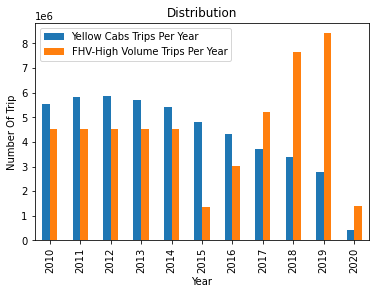

In [75]:
# let show the distribution of those 2 Licenses Class
NewDataFrame1[['Yellow Cabs Trips Per Year', 'FHV-High Volume Trips Per Year']].plot.bar()
plt.title("Distribution")
plt.ylabel("Number Of Trip")

In [76]:
# Let compare also the trips of the rest such as Green cabs, Black cabs, FHV-Livery, and FHV-Lux Limo
NewDataFrame2 = pd.concat([Green_Cabs, Black_Cabs, Livery, Lux_Limo], axis = 1)
NewDataFrame2

,Green Cabs Trips Per Year,Black Cabs Trips Per Year,FHV- LiveryTrips Per Year,FHV- Lux- Limo Trips Per Year
Year,,,,
2013,39519.0,NaN,NaN,NaN
2014,520251.0,NaN,NaN,NaN
2015,632672.0,116984.0,555206.0,41994.0
2016,537538.0,169830.0,1079347.0,45407.0
2017,386194.0,174603.0,832363.0,38861.0
2018,289476.0,194906.0,621840.0,37093.0
2019,185100.0,174081.0,465040.0,28598.0
2020,27189.0,22195.0,35036.0,2079.0


In [77]:
mean4 = NewDataFrame2['Black Cabs Trips Per Year'].mean()
print(mean4)
mean5 = NewDataFrame2['FHV- LiveryTrips Per Year'].mean()
print(mean5)
mean6 = NewDataFrame2['FHV- Lux- Limo Trips Per Year'].mean()
print(mean6)

142099.83333333334
598138.6666666666
32338.666666666668


In [78]:
NewDataFrame2['Black Cabs Trips Per Year'].fillna(mean4, inplace = True)
NewDataFrame2['FHV- LiveryTrips Per Year'].fillna(mean5, inplace = True)
NewDataFrame2['FHV- Lux- Limo Trips Per Year'].fillna(mean6, inplace = True)
NewDataFrame2

,Green Cabs Trips Per Year,Black Cabs Trips Per Year,FHV- LiveryTrips Per Year,FHV- Lux- Limo Trips Per Year
Year,,,,
2013,39519.0,142099.833333,5.981387e+05,32338.666667
2014,520251.0,142099.833333,5.981387e+05,32338.666667
2015,632672.0,116984.000000,5.552060e+05,41994.000000
2016,537538.0,169830.000000,1.079347e+06,45407.000000
2017,386194.0,174603.000000,8.323630e+05,38861.000000
2018,289476.0,194906.000000,6.218400e+05,37093.000000
2019,185100.0,174081.000000,4.650400e+05,28598.000000
2020,27189.0,22195.000000,3.503600e+04,2079.000000


Text(0, 0.5, 'Number Of Trip')

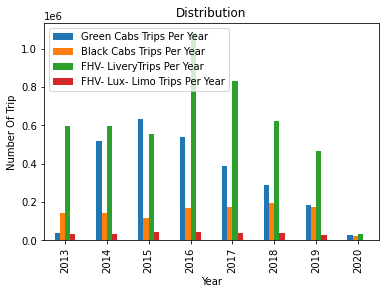

In [79]:
# let show the distribution of those 4 Licenses Class
NewDataFrame2[['Green Cabs Trips Per Year', 'Black Cabs Trips Per Year', 'FHV- LiveryTrips Per Year', 'FHV- Lux- Limo Trips Per Year']].plot.bar()
plt.title("Distribution")
plt.ylabel("Number Of Trip")